# Descriptive analytics

# Temporal Demand Patterns & Seasonality # Lina
- Pro Tag / Pro Woche / Pro Monat / Pro Jahr 
- Mit Wetterdaten vergleichen
 

## Geographical Demand Patterns # Nico, Jieyu
## ? Pro Stadtteil angemeldete Autos
## Altersgruppen je Stadtteil -> Zusammenhang zu Abo Modellen
## Pass -> Häufig für den Arbeitsweg? (RoundTrip, OneWay, Zeiten)

## KPIs
- Aktuelle Auslastung (Live & Historisch, Pro Station) (-> Mehr Stationen, Fahrräder?) # Lukas 
- Ausfall/Probleme: (Wartungsaufwand (z.B. in Prozent available/not available), ) # Ange
- Umsatz durch "Minutengeld" # Marc
- Anteil an Arten von Passhaltern?
- Anteil von Tripcategories?


In [233]:
import numpy as np
import pandas as pd


import matplotlib
import matplotlib.pyplot as pp
import seaborn as sns

from sklearn.linear_model import LinearRegression

import glob

%matplotlib inline

## preparing & cleaning data



In [136]:
csv_files = glob.glob('Datasets/RideIndego 2016/*.csv')
df = pd.concat([pd.read_csv(f) for f  in csv_files], ignore_index = True)

### Find out NaN Values

In [137]:
df.isna().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station_id         10
start_lat                17
start_lon                17
end_station_id            0
end_lat                1591
end_lon                1591
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
dtype: int64

### Drop any Row with NaN 0 in end_lat end_lon



In [138]:
df['start_lat'] = pd.to_numeric(df['start_lat'], errors='coerce')
df['start_lon'] = pd.to_numeric(df['start_lon'], errors='coerce')
df['start_station_id'] = pd.to_numeric(df['start_station_id'], errors='coerce')
df['end_station_id'] = pd.to_numeric(df['end_station_id'], errors='coerce')
df['end_lat'] = pd.to_numeric(df['end_lat'], errors='coerce')
df['end_lon'] = pd.to_numeric(df['end_lon'], errors='coerce')
df['bike_id'] = pd.to_numeric(df['bike_id'], errors='coerce')
df['plan_duration'] = pd.to_numeric(df['plan_duration'], errors='coerce')

In [139]:
df.isna().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station_id         10
start_lat                69
start_lon                69
end_station_id            0
end_lat                3023
end_lon                3023
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
dtype: int64

In [140]:
df = df.dropna(how='any').reset_index(drop=True)
df

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,25183529,240,7/1/2016 0:07,7/1/2016 0:11,3063.0,39.946331,-75.169800,3064,39.938400,-75.173271,3640,30,One Way,Indego30
1,25183528,480,7/1/2016 0:10,7/1/2016 0:18,3124.0,39.952950,-75.139793,3026,39.941380,-75.145638,3349,30,One Way,Indego30
2,25183527,1020,7/1/2016 0:11,7/1/2016 0:28,3043.0,39.930820,-75.174744,3034,39.933151,-75.162483,5279,30,One Way,Indego30
3,25183526,1500,7/1/2016 0:13,7/1/2016 0:38,3026.0,39.941380,-75.145638,3026,39.941380,-75.145638,5198,0,Round Trip,Walk-up
4,25183525,2700,7/1/2016 0:13,7/1/2016 0:58,3037.0,39.954239,-75.161377,3010,39.947109,-75.166183,3382,0,One Way,Walk-up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651966,4828349,540,6/30/2016 23:37,6/30/2016 23:46,3028.0,39.940610,-75.149580,3063,39.946330,-75.169800,3577,30,One Way,Indego30
651967,4828348,60,6/30/2016 23:37,6/30/2016 23:38,3066.0,39.945610,-75.173480,3066,39.945610,-75.173480,3535,0,Round Trip,Walk-up
651968,4828352,900,6/30/2016 23:38,6/30/2016 23:53,3010.0,39.947110,-75.166180,3070,39.960620,-75.139830,2594,0,One Way,Walk-up
651969,4828353,60,6/30/2016 23:38,6/30/2016 23:39,3037.0,39.954240,-75.161380,3037,39.954240,-75.161380,3303,30,Round Trip,Indego30


### Further Inspectation of data to prepare descriptive analysis (Marc)


In [141]:
df.describe()

,trip_id,duration,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration
count,6.519710e+05,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000
mean,3.510074e+07,1304.646955,3047.424994,39.952599,-75.168769,3046.760276,39.846196,-74.968480,4017.813906,29.610144
std,2.720246e+07,3656.709547,31.559946,0.070884,0.132684,31.432813,2.056511,3.869193,1735.005923,40.916349
min,4.516691e+06,60.000000,3000.000000,0.000000,-75.223991,3000.000000,0.000000,-75.223991,2472.000000,0.000000
25%,4.725896e+06,480.000000,3023.000000,39.945610,-75.179710,3022.000000,39.945271,-75.179390,3280.000000,30.000000
50%,3.870654e+07,720.000000,3043.000000,39.951120,-75.167351,3041.000000,39.950710,-75.167107,3536.000000,30.000000
75%,5.701548e+07,1200.000000,3063.000000,39.959229,-75.158127,3063.000000,39.957081,-75.156952,5190.000000,30.000000
max,8.758284e+07,86400.000000,3129.000000,39.991791,0.000000,3129.000000,39.991791,0.000000,55195.000000,365.000000


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651971 entries, 0 to 651970
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              651971 non-null  int64  
 1   duration             651971 non-null  int64  
 2   start_time           651971 non-null  object 
 3   end_time             651971 non-null  object 
 4   start_station_id     651971 non-null  float64
 5   start_lat            651971 non-null  float64
 6   start_lon            651971 non-null  float64
 7   end_station_id       651971 non-null  int64  
 8   end_lat              651971 non-null  float64
 9   end_lon              651971 non-null  float64
 10  bike_id              651971 non-null  int64  
 11  plan_duration        651971 non-null  int64  
 12  trip_route_category  651971 non-null  object 
 13  passholder_type      651971 non-null  object 
dtypes: float64(5), int64(5), object(4)
memory usage: 69.6+ MB


Alteration of start_time and end_time to datetime type

In [143]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [144]:
df['end_time'] = pd.to_datetime(df['end_time'])

Calculate the length of a trip

In [145]:
df["duration_trip"] = df["end_time"] - df["start_time"]

Now I am breaking the datetime of start_time into smaller parts(days, time, hour) to make it possible to visualize the usage over different periods. I am taking the start_time, not the end_time since it shows the demand.

In [146]:
df['date'] = df['start_time'].dt.strftime('%m-%d')
#here something is not working correctly yet, has to be further examined

In [147]:
df["time"] = df["start_time"].apply(lambda dt: dt.time)

In [148]:
df["hour"] = df["start_time"].apply(lambda dt: dt.hour)

In [149]:
df["weekday"] = df["start_time"].apply(lambda dt: dt.dayofweek)

In [150]:
df["month"] = df["start_time"].apply(lambda dt: dt.month)

In [151]:
df["full_date"] = [d.date() for d in df["start_time"]]


In [152]:
df['date_hour'] = df['start_time'].dt.strftime('%m-%d-%H')


In [153]:
#for a later purpose we will convert the duration from seconds to minutes, dividing it by 60:
df["duration"] = df["duration"] / 60

Inspection of new dataframe, uncomment if necessary

In [154]:
df.head()

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,...,trip_route_category,passholder_type,duration_trip,date,time,hour,weekday,month,full_date,date_hour
0,25183529,4.0,2016-07-01 00:07:00,2016-07-01 00:11:00,3063.0,39.946331,-75.169800,3064,39.938400,-75.173271,...,One Way,Indego30,0 days 00:04:00,07-01,<built-in method time of Timestamp object at 0...,0,4,7,2016-07-01,07-01-00
1,25183528,8.0,2016-07-01 00:10:00,2016-07-01 00:18:00,3124.0,39.952950,-75.139793,3026,39.941380,-75.145638,...,One Way,Indego30,0 days 00:08:00,07-01,<built-in method time of Timestamp object at 0...,0,4,7,2016-07-01,07-01-00
2,25183527,17.0,2016-07-01 00:11:00,2016-07-01 00:28:00,3043.0,39.930820,-75.174744,3034,39.933151,-75.162483,...,One Way,Indego30,0 days 00:17:00,07-01,<built-in method time of Timestamp object at 0...,0,4,7,2016-07-01,07-01-00
3,25183526,25.0,2016-07-01 00:13:00,2016-07-01 00:38:00,3026.0,39.941380,-75.145638,3026,39.941380,-75.145638,...,Round Trip,Walk-up,0 days 00:25:00,07-01,<built-in method time of Timestamp object at 0...,0,4,7,2016-07-01,07-01-00
4,25183525,45.0,2016-07-01 00:13:00,2016-07-01 00:58:00,3037.0,39.954239,-75.161377,3010,39.947109,-75.166183,...,One Way,Walk-up,0 days 00:45:00,07-01,<built-in method time of Timestamp object at 0...,0,4,7,2016-07-01,07-01-00


In [155]:
df.weekday.unique()

array([4, 5, 6, 0, 1, 2, 3])

### Including the weather data 

In [156]:
#import weather data
#STR_Nov = pd.read_csv("Car2Go_STR_SampleData.csv", encoding = "ISO-8859-1")
weather = pd.read_csv('weather_hourly_philadelphia.csv')

In [157]:
weather.head()

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,3.3,3.3,0.0
1,2015-01-02 02:00:00,2.8,2.8,0.0
2,2015-01-02 03:00:00,2.2,2.2,0.0
3,2015-01-02 04:00:00,0.6,0.6,0.0
4,2015-01-02 05:00:00,1.1,1.1,0.0


In [158]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43785 non-null  object 
 1   max_temp   43785 non-null  float64
 2   min_temp   43785 non-null  float64
 3   precip     43785 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [187]:
weather['date_time'] = pd.to_datetime(weather['date_time'])
weather['date'] = weather['date_time'].dt.strftime('%m-%d')
weather['hour'] = weather["date_time"].apply(lambda dt: dt.hour)

In [188]:
weather['date_hour'] = weather['date_time'].dt.strftime('%m-%d-%H')
weather['year'] = pd.DatetimeIndex(weather['date_time']).year
weather = weather[weather['year'] == 2016]

#pd. DatetimeIndex(df['date']). year.
weather.head()

,date_time,max_temp,min_temp,precip,date_hour,year,date,hour
8736,2016-01-01 01:00:00,7.2,7.2,0.0,01-01-01,2016,01-01,1
8737,2016-01-01 02:00:00,6.7,6.7,0.0,01-01-02,2016,01-01,2
8738,2016-01-01 03:00:00,6.7,6.7,0.0,01-01-03,2016,01-01,3
8739,2016-01-01 04:00:00,6.1,6.1,0.0,01-01-04,2016,01-01,4
8740,2016-01-01 05:00:00,6.1,6.1,0.0,01-01-05,2016,01-01,5


Combine both dataframes into one using mapping:

In [170]:
# have to use something else than a full merge as it duplicates everything from df
df_weather = pd.merge(df, weather, on="date_hour", how="left") 

In [173]:
# let us take another look at the merged dataframe:
df_weather.head()


,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,...,hour,weekday,month,full_date,date_hour,date_time,max_temp,min_temp,precip,year
0,25183529,4.0,2016-07-01 00:07:00,2016-07-01 00:11:00,3063.0,39.946331,-75.169800,3064,39.938400,-75.173271,...,0,4,7,2016-07-01,07-01-00,2016-07-01,27.2,27.2,0.0,2016.0
1,25183528,8.0,2016-07-01 00:10:00,2016-07-01 00:18:00,3124.0,39.952950,-75.139793,3026,39.941380,-75.145638,...,0,4,7,2016-07-01,07-01-00,2016-07-01,27.2,27.2,0.0,2016.0
2,25183527,17.0,2016-07-01 00:11:00,2016-07-01 00:28:00,3043.0,39.930820,-75.174744,3034,39.933151,-75.162483,...,0,4,7,2016-07-01,07-01-00,2016-07-01,27.2,27.2,0.0,2016.0
3,25183526,25.0,2016-07-01 00:13:00,2016-07-01 00:38:00,3026.0,39.941380,-75.145638,3026,39.941380,-75.145638,...,0,4,7,2016-07-01,07-01-00,2016-07-01,27.2,27.2,0.0,2016.0
4,25183525,45.0,2016-07-01 00:13:00,2016-07-01 00:58:00,3037.0,39.954239,-75.161377,3010,39.947109,-75.166183,...,0,4,7,2016-07-01,07-01-00,2016-07-01,27.2,27.2,0.0,2016.0


# Task 2: Descriptive analytics

### a) Temporal Demand Patterns and Seasonality (Lina, Marc)

In [97]:
#calculate the demand per hour
#hourly_demand = df.groupby(["hour"]).agg(demand=("bike_id", 'count'))
#hourly_demand = pd.DataFrame(hourly_demand)
#hourly_demand
hourly_demand = df.groupby(["date","hour"])["trip_id"].nunique()
hourly_demand = pd.DataFrame(hourly_demand)
hourly_demand


trip_id
date  hour         
01-01 0          26
      1          40
      2          33
      3           6
      4           1
...             ...
12-31 19         28
      20         29
      21         18
      22         21
      23         12

[8535 rows x 1 columns]

pandas.core.frame.DataFrame

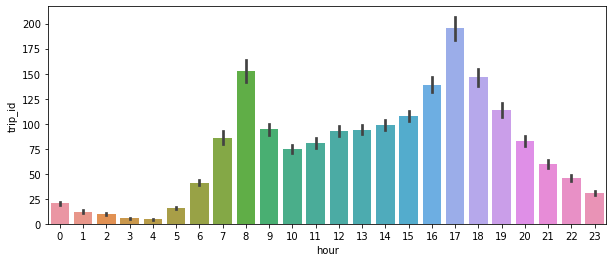

In [101]:
fig, ax = pp.subplots(figsize=(10,4))

sns.barplot(x=hourly_demand.index.get_level_values(1), y=hourly_demand["trip_id"],ax=ax)

pp.show()

In [108]:
#demand per weekday:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#daily_demand = df.groupby(["weekday"]).agg(demand=("bike_id", 'count'))
daily_demand = df.groupby(["month","weekday"])["trip_id"].nunique()
daily_demand = pd.DataFrame(daily_demand)
daily_demand

trip_id
month weekday         
1     0           1836
      1           2023
      2           2538
      3           3083
      4           3790
...                ...
12    2           5366
      3           6780
      4           6164
      5           3453
      6           2860

[84 rows x 1 columns]

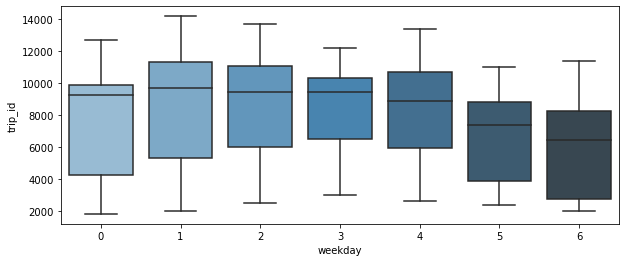

In [110]:
fig, ax = pp.subplots(figsize=(10,4))

sns.boxplot(x=daily_demand.index.get_level_values(1),y=daily_demand["trip_id"], palette = 'Blues_d')


pp.show()

In [116]:
#calculate the monthly demand:
# different approach:
#monthly_demand = df.groupby(["month"]).agg(demand=("bike_id", 'count'))
monthly_demand = df.groupby(["month"])["trip_id"].nunique()

monthly_demand = pd.DataFrame(monthly_demand)
monthly_demand

,trip_id
month,
1,17773
2,19284
3,36102
4,42324
5,55922
6,72578
7,76215
8,77673
9,79578


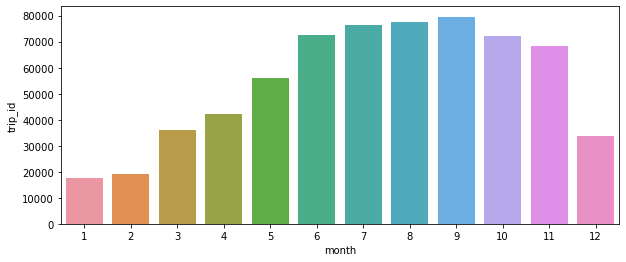

In [118]:
fig, ax = pp.subplots(figsize=(10,4))

sns.barplot(x=monthly_demand.index.get_level_values(0), y=monthly_demand["trip_id"],ax=ax)
pp.show()

### c) KPIs

Our first KPI is the current gross revenue which is calculated by the duration of the trip times $0,15 which is listed as the price/minute on Indego's website. We have to make some adjustments based depending on the type of pass the user has. For that we create a new dataframe only containing relevant data for us which includes the duration of the trip, the ID, the passtype, as well as some time info.

In [45]:
price_per_minute = 0.15

In [46]:
rev = df[['trip_id', 'duration', 'start_time', 'end_time', 'passholder_type', 'hour','date_hour']].copy()

In [47]:
rev.head()

,trip_id,duration,start_time,end_time,passholder_type,hour,date_hour
0,25183529,4.0,2016-07-01 00:07:00,2016-07-01 00:11:00,Indego30,0,07-01-00
1,25183528,8.0,2016-07-01 00:10:00,2016-07-01 00:18:00,Indego30,0,07-01-00
2,25183527,17.0,2016-07-01 00:11:00,2016-07-01 00:28:00,Indego30,0,07-01-00
3,25183526,25.0,2016-07-01 00:13:00,2016-07-01 00:38:00,Walk-up,0,07-01-00
4,25183525,45.0,2016-07-01 00:13:00,2016-07-01 00:58:00,Walk-up,0,07-01-00


Since we take the price per minute and the duration of the trip is in seconds, we are going to divide the duration by 60 to get it in minutes.

In [48]:
#rev["duration"] = rev["duration"]/60

In [49]:
a = rev['passholder_type'].unique()
a

array(['Indego30', 'Walk-up', 'IndegoFlex'], dtype=object)

In [50]:
rev['relevant_duration'] = rev.duration + rev.passholder_type.map( lambda x: -30 if x == 'Walk-up' else -60)

In [51]:
rev.head()

,trip_id,duration,start_time,end_time,passholder_type,hour,date_hour,relevant_duration
0,25183529,4.0,2016-07-01 00:07:00,2016-07-01 00:11:00,Indego30,0,07-01-00,-56.0
1,25183528,8.0,2016-07-01 00:10:00,2016-07-01 00:18:00,Indego30,0,07-01-00,-52.0
2,25183527,17.0,2016-07-01 00:11:00,2016-07-01 00:28:00,Indego30,0,07-01-00,-43.0
3,25183526,25.0,2016-07-01 00:13:00,2016-07-01 00:38:00,Walk-up,0,07-01-00,-5.0
4,25183525,45.0,2016-07-01 00:13:00,2016-07-01 00:58:00,Walk-up,0,07-01-00,15.0


In [52]:
rev.loc[rev.relevant_duration <= 0, "relevant_duration"] = 0

In [53]:
rev["rev_flex"] = rev["relevant_duration"] * price_per_minute

In [54]:
rev.head()

,trip_id,duration,start_time,end_time,passholder_type,hour,date_hour,relevant_duration,rev_flex
0,25183529,4.0,2016-07-01 00:07:00,2016-07-01 00:11:00,Indego30,0,07-01-00,0.0,0.00
1,25183528,8.0,2016-07-01 00:10:00,2016-07-01 00:18:00,Indego30,0,07-01-00,0.0,0.00
2,25183527,17.0,2016-07-01 00:11:00,2016-07-01 00:28:00,Indego30,0,07-01-00,0.0,0.00
3,25183526,25.0,2016-07-01 00:13:00,2016-07-01 00:38:00,Walk-up,0,07-01-00,0.0,0.00
4,25183525,45.0,2016-07-01 00:13:00,2016-07-01 00:58:00,Walk-up,0,07-01-00,15.0,2.25


In [55]:
sum(rev["rev_flex"])

624540.7500000114

In [56]:
hourly_rev = rev.groupby(["date_hour"]).agg(revenue=("rev_flex", 'sum'))
hourly_rev = pd.DataFrame(hourly_rev)
hourly_rev

,revenue
date_hour,
01-01-00,81.15
01-01-01,360.45
01-01-02,271.35
01-01-03,40.35
01-01-04,0.00
...,...
12-31-19,3.75
12-31-20,0.00
12-31-21,87.75


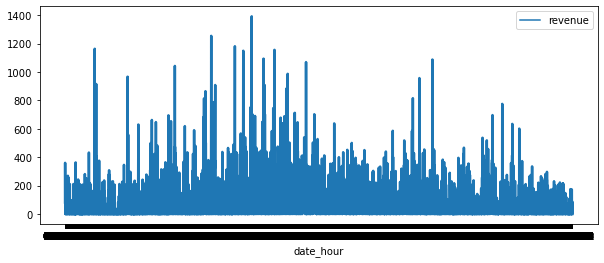

In [57]:
fig, ax = pp.subplots(figsize=(10,4))

sns.lineplot(data=hourly_rev, palette="tab10", linewidth=2.5)
pp.show()

Another KPI could be the share of walkups vs. passcard holder.

In [58]:
type_shares = df[['passholder_type', 'date_hour']].copy()

In [59]:
type_shares['type'] = type_shares.passholder_type.map( lambda x: 0 if x == 'Walk-up' else 1)

In [60]:
type_shares.head()

,passholder_type,date_hour,type
0,Indego30,07-01-00,1
1,Indego30,07-01-00,1
2,Indego30,07-01-00,1
3,Walk-up,07-01-00,0
4,Walk-up,07-01-00,0


In [61]:
hourly_share = type_shares.groupby(["date_hour", "type"]).count()
hourly_share = pd.DataFrame(hourly_share)
hourly_share

passholder_type
date_hour type                 
01-01-00  0                  11
          1                  15
01-01-01  0                  28
          1                  12
01-01-02  0                  21
...                         ...
12-31-21  0                   1
          1                  17
12-31-22  0                  13
          1                   8
12-31-23  1                  12

[15894 rows x 1 columns]

In [62]:
hourly_share_per = hourly_share.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [63]:
hourly_share_per

passholder_type
date_hour type                 
01-01-00  0           42.307692
          1           57.692308
01-01-01  0           70.000000
          1           30.000000
01-01-02  0           63.636364
...                         ...
12-31-21  0            5.555556
          1           94.444444
12-31-22  0           61.904762
          1           38.095238
12-31-23  1          100.000000

[15894 rows x 1 columns]

#  Task 3: Predictive Analytics

Future demand is a key factor that will steer operational decision making of a shared rental network. As a data scientist it is your responsibility to facilitate this type of decision support. For the purpose of this assignment we will be interested in forecasting total system-level demand in the next hour. To do so, develop a prediction model that predicts bike rental demand as a function of suitable features available in or derived from the datasets (incl. the weather data).

First of all, i am going to create a table that contains the demand of the hour along with some features as temperature, the hour of course, the day of the week and the time of the year.

In [194]:
#new_df = df[["trip_id","weekday", "month"]].groupby(["weekday"])'

new_df_merged = pd.merge(weather, hourly_demand, on=["date", "hour"], how = "right")
new_df_merged["demand"] = new_df_merged["trip_id"]

new_df_merged

,date_time,max_temp,min_temp,precip,date_hour,year,date,hour,trip_id,demand
0,2016-01-01 00:00:00,6.7,6.7,0.0,01-01-00,2016.0,01-01,0,26,26
1,2016-01-01 01:00:00,7.2,7.2,0.0,01-01-01,2016.0,01-01,1,40,40
2,2016-01-01 02:00:00,6.7,6.7,0.0,01-01-02,2016.0,01-01,2,33,33
3,2016-01-01 03:00:00,6.7,6.7,0.0,01-01-03,2016.0,01-01,3,6,6
4,2016-01-01 04:00:00,6.1,6.1,0.0,01-01-04,2016.0,01-01,4,1,1
...,...,...,...,...,...,...,...,...,...,...
8981,2016-12-31 19:00:00,6.1,6.1,0.0,12-31-19,2016.0,12-31,19,28,28
8982,2016-12-31 20:00:00,6.7,6.7,0.0,12-31-20,2016.0,12-31,20,29,29
8983,2016-12-31 21:00:00,6.7,6.7,0.0,12-31-21,2016.0,12-31,21,18,18
8984,2016-12-31 22:00:00,6.7,6.7,0.0,12-31-22,2016.0,12-31,22,21,21


In [195]:
new_df_merged.drop(columns = ['trip_id'])

,date_time,max_temp,min_temp,precip,date_hour,year,date,hour,demand
0,2016-01-01 00:00:00,6.7,6.7,0.0,01-01-00,2016.0,01-01,0,26
1,2016-01-01 01:00:00,7.2,7.2,0.0,01-01-01,2016.0,01-01,1,40
2,2016-01-01 02:00:00,6.7,6.7,0.0,01-01-02,2016.0,01-01,2,33
3,2016-01-01 03:00:00,6.7,6.7,0.0,01-01-03,2016.0,01-01,3,6
4,2016-01-01 04:00:00,6.1,6.1,0.0,01-01-04,2016.0,01-01,4,1
...,...,...,...,...,...,...,...,...,...
8981,2016-12-31 19:00:00,6.1,6.1,0.0,12-31-19,2016.0,12-31,19,28
8982,2016-12-31 20:00:00,6.7,6.7,0.0,12-31-20,2016.0,12-31,20,29
8983,2016-12-31 21:00:00,6.7,6.7,0.0,12-31-21,2016.0,12-31,21,18
8984,2016-12-31 22:00:00,6.7,6.7,0.0,12-31-22,2016.0,12-31,22,21


In [239]:
xp = new_df_merged['max_temp']
yp = new_df_merged['demand']
xp

0       6.7
1       7.2
2       6.7
3       6.7
4       6.1
       ... 
8981    6.1
8982    6.7
8983    6.7
8984    6.7
8985    6.1
Name: max_temp, Length: 8986, dtype: float64

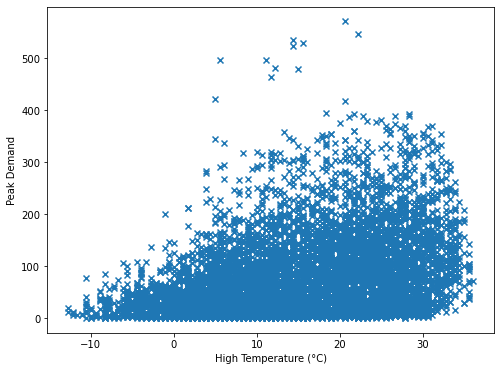

In [199]:
fig, ax = pp.subplots(figsize = (8,6))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

pp.show()

We have to normalize the data to make it work properly:

In [248]:
x_nor = (xp-min(xp))/(max(xp)-min(xp))

y_nor = (yp-min(yp))/(max(yp)-min(yp))


0.0

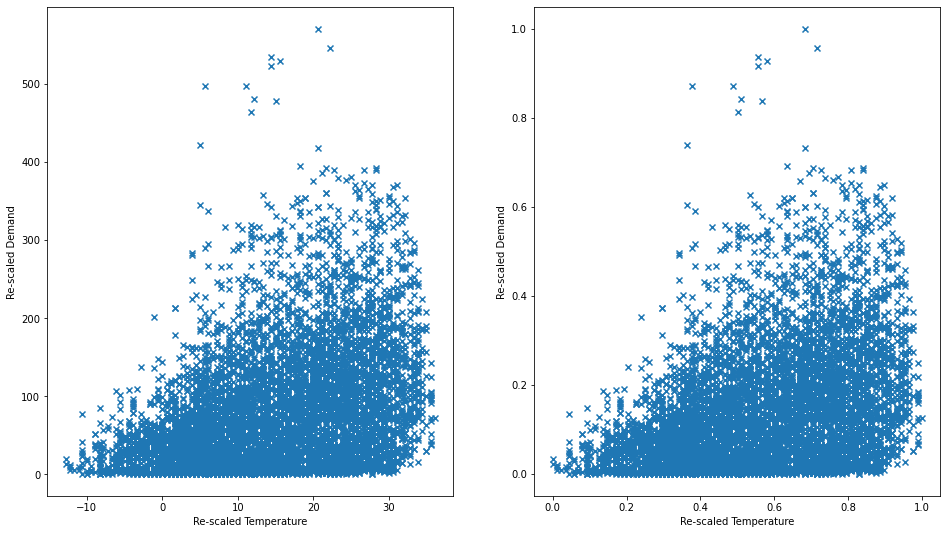

In [202]:
fig, axes = pp.subplots(1,2,figsize = (16,9))

axes[0].scatter(xp, yp, marker='x')
axes[0].set_xlabel("Re-scaled Temperature")
axes[0].set_ylabel("Re-scaled Demand")

axes[1].scatter(x_nor, y_nor, marker = 'x')
axes[1].set_xlabel("Re-scaled Temperature")
axes[1].set_ylabel("Re-scaled Demand")

pp.show()

In [286]:
y = new_df_merged["max_temp"].values.reshape((-1, 1))
X = new_df_merged["demand"]


In [287]:
lm = LinearRegression(fit_intercept=True, normalize=False)

In [288]:
linear_model

LinearRegression()

In [289]:
linear_model.fit(X, y)
print(linear_model.coef_, linear_model.intercept_)

ValueError: Expected 2D array, got 1D array instead:
array=[26 40 33 ... 18 21 12].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

AttributeError: 'Series' object has no attribute 'reshape'